In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the Data
file_path = r"C:\Users\Joseph\Desktop\School\Masters Data Science\Applied Data Science\Forex project\FX_IDC_EURUSD, 1D.csv"
forex_data = pd.read_csv(file_path)

# Display the first few rows
forex_data.head()

,time,open,high,low,close
0,1701208800,1.09912,1.10171,1.09602,1.09700
1,1701295200,1.09691,1.09840,1.08794,1.08860
2,1701381600,1.08854,1.09127,1.08289,1.08818
3,1701640800,1.08859,1.08950,1.08042,1.08360
4,1701727200,1.08351,1.08475,1.07780,1.07950


In [3]:
# Convert time column to datetime
forex_data['Date'] = pd.to_datetime(forex_data['time'], unit='s')
forex_data.drop('time', axis=1, inplace=True)

# Rename columns
forex_data.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close'}, inplace=True)

# Check for missing values
print(forex_data.isnull().sum())

# Drop duplicates if any
forex_data.drop_duplicates(inplace=True)

Open     0
High     0
Low      0
Close    0
Date     0
dtype: int64


In [4]:
# Calculate Daily Returns
forex_data['Daily_Return'] = forex_data['Close'].pct_change()

# Calculate Average True Range (ATR)
forex_data['True_Range'] = np.maximum(forex_data['High'] - forex_data['Low'],
                                      np.maximum(abs(forex_data['High'] - forex_data['Close'].shift(1)),
                                                 abs(forex_data['Low'] - forex_data['Close'].shift(1))))
forex_data['ATR'] = forex_data['True_Range'].rolling(window=14).mean()

# Calculate Bollinger Bands
rolling_mean = forex_data['Close'].rolling(window=20).mean()
rolling_std = forex_data['Close'].rolling(window=20).std()
forex_data['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
forex_data['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)

# Drop NaN values
forex_data.dropna(inplace=True)

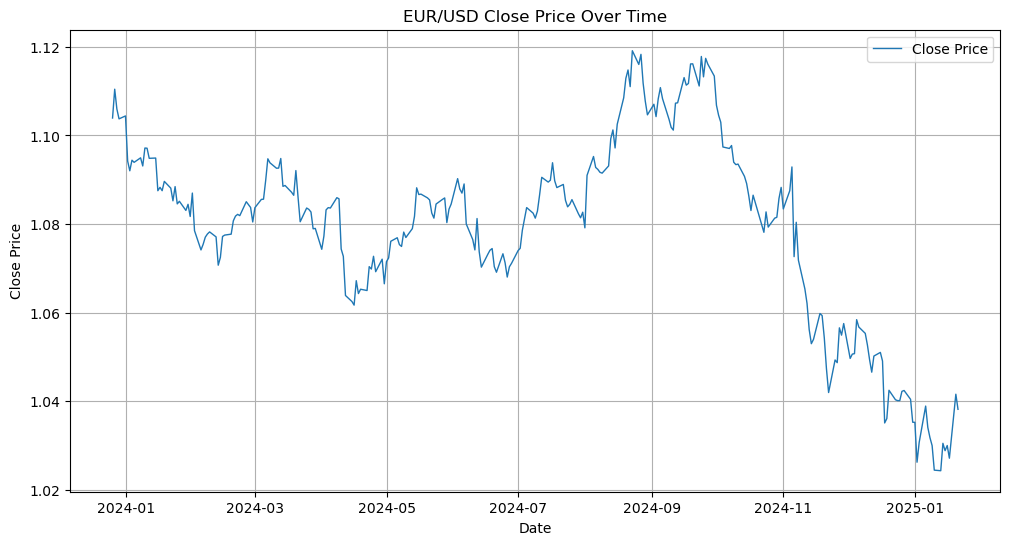

In [5]:
# Close Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(forex_data['Date'], forex_data['Close'], label='Close Price', linewidth=1)
plt.title('EUR/USD Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

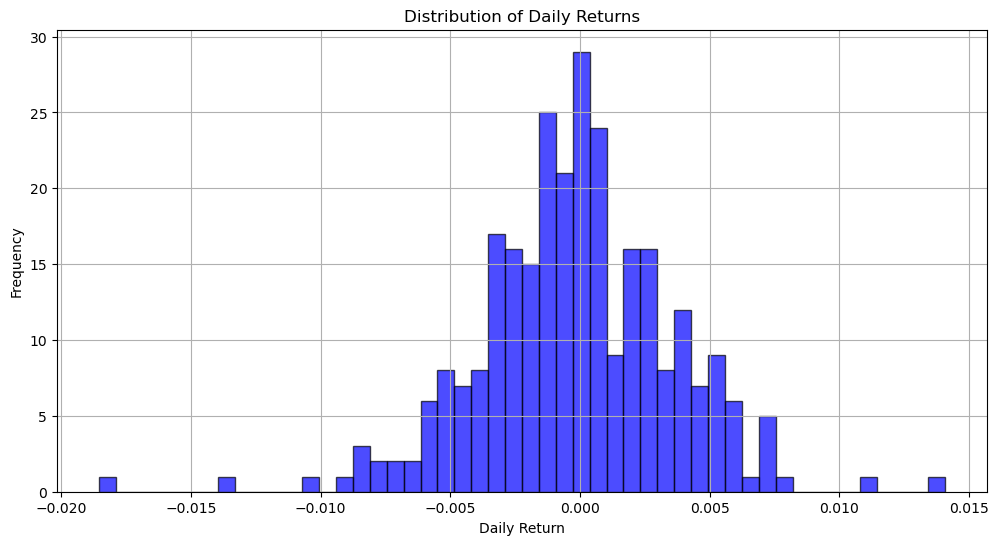

In [6]:
# Distribution of Daily Returns
plt.figure(figsize=(12, 6))
plt.hist(forex_data['Daily_Return'].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()

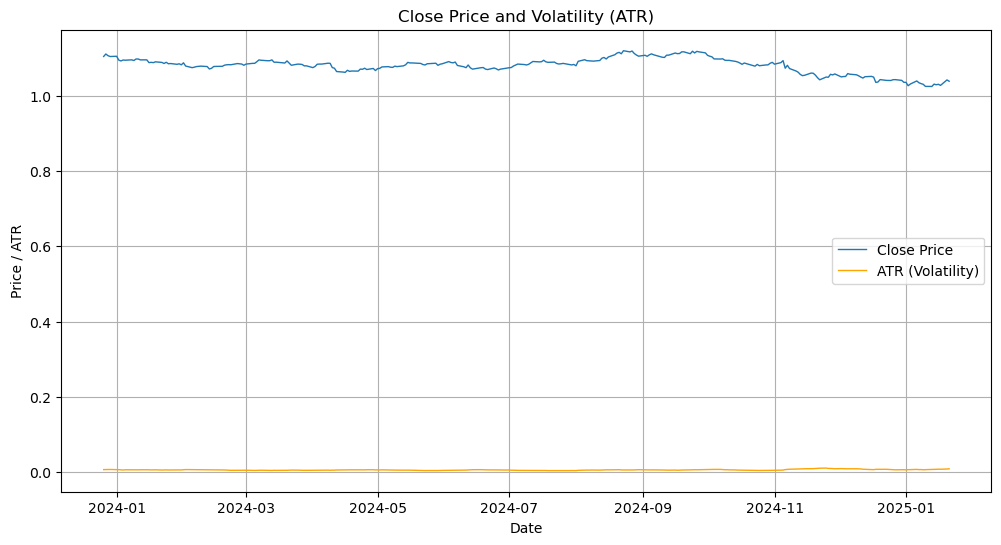

In [7]:
# Close Price and ATR
plt.figure(figsize=(12, 6))
plt.plot(forex_data['Date'], forex_data['Close'], label='Close Price', linewidth=1)
plt.plot(forex_data['Date'], forex_data['ATR'], label='ATR (Volatility)', linewidth=1, color='orange')
plt.title('Close Price and Volatility (ATR)')
plt.xlabel('Date')
plt.ylabel('Price / ATR')
plt.legend()
plt.grid()
plt.show()

In [8]:
# Prepare data
features = ['Daily_Return', 'ATR', 'Bollinger_Upper', 'Bollinger_Lower']
X = forex_data[features]
y = forex_data['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)

Random Forest RMSE: 0.028710939287558274
Random Forest R²: -2.7347617955736134


In [9]:
# Fit ARIMA model
arima_model = ARIMA(forex_data['Close'], order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecasting
forecast_steps = len(y_test)
arima_forecast = arima_result.forecast(steps=forecast_steps)

# Evaluation
arima_rmse = mean_squared_error(y_test, arima_forecast, squared=False)
arima_r2 = r2_score(y_test, arima_forecast)

print("ARIMA RMSE:", arima_rmse)
print("ARIMA R²:", arima_r2)

C:\Users\Joseph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Joseph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Joseph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA RMSE: 0.017499437460746153
ARIMA R²: -0.387446615960628


C:\Users\Joseph\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Joseph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Joseph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
